In [ ]:
#Library for mathematical computation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Library for modelling
from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression model
from sklearn.linear_model import Lasso #Lasso regression model
from sklearn.linear_model import Ridge #Ridge Regression Model
from sklearn.ensemble import RandomForestRegressor#Random Forest Regression Model
from sklearn.metrics import mean_absolute_error 

#Libraries for Deep Learning
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

#Library for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
#Reading CSV Data
dataset=pd.read_csv("spotify_dataset.csv")
dataset.head(10)

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',"48,633,449",Måneskin,3377762,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.8,-4.808,0.0504,0.127,0.359,134.002,211560,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),"47,248,719",The Kid LAROI,2230022,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.0383,0.103,169.928,141806,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,"40,162,559",Olivia Rodrigo,6266514,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.154,0.335,0.0849,166.928,178147,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,"37,799,456",Ed Sheeran,83293380,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.0469,0.364,126.026,231041,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),"33,948,454",Lil Nas X,5473565,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894,D#/Eb
5,6,1,18,2021-05-07--2021-05-14,MONTERO (Call Me By Your Name),"30,071,134",Lil Nas X,5473565,67BtfxlNbhBmCDR2L2l8qd,"['lgbtq+ hip hop', 'pop rap']",...,0.61,0.508,-6.682,0.152,0.297,0.384,178.818,137876,0.758,G#/Ab
6,7,3,16,2021-05-14--2021-05-21,Kiss Me More (feat. SZA),"29,356,736",Doja Cat,8640063,748mdHapucXQri7IAO8yFK,"['dance pop', 'pop']",...,0.762,0.701,-3.541,0.0286,0.235,0.123,110.968,208867,0.742,G#/Ab
7,8,2,10,2021-06-18--2021-06-25,Todo De Ti,"26,951,613",Rauw Alejandro,6080597,4fSIb4hdOQ151TILNsSEaF,"['puerto rican pop', 'trap latino']",...,0.78,0.718,-3.605,0.0506,0.31,0.0932,127.949,199604,0.342,D#/Eb
8,9,3,8,2021-06-18--2021-06-25,Yonaguni,"25,030,128",Bad Bunny,36142273,2JPLbjOn0wPCngEot2STUS,"['latin', 'reggaeton', 'trap latino']",...,0.644,0.648,-4.601,0.118,0.276,0.135,179.951,206710,0.44,C#/Db
9,10,8,10,2021-07-02--2021-07-09,I WANNA BE YOUR SLAVE,"24,551,591",Måneskin,3377762,4pt5fDVTg5GhEvEtlz9dKk,"['indie rock italiano', 'italian pop']",...,0.75,0.608,-4.008,0.0387,0.00165,0.178,132.507,173347,0.958,C#/Db


In [ ]:
#Displaying metadata/information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      1556 non-null   int64 
 1   Highest Charting Position  1556 non-null   int64 
 2   Number of Times Charted    1556 non-null   int64 
 3   Week of Highest Charting   1556 non-null   object
 4   Song Name                  1556 non-null   object
 5   Streams                    1556 non-null   object
 6   Artist                     1556 non-null   object
 7   Artist Followers           1556 non-null   object
 8   Song ID                    1556 non-null   object
 9   Genre                      1556 non-null   object
 10  Release Date               1556 non-null   object
 11  Weeks Charted              1556 non-null   object
 12  Popularity                 1556 non-null   object
 13  Danceability               1556 non-null   object
 14  Energy  

# Cleaning Data

As the dataset is small, Microsoft Excel was used to clean the data.
The Following steps were taken to clean the dataset.
1. Changing Datatypes of Data Columns
2. Removing values with more than 80% Null values
3. Removing Data Columns that are Irrelevant to the analysis.


In [ ]:
#loading Clean Data
cleaned_data=pd.read_csv("cleaned_spotify_dataset.csv")
cleaned_data.head()

,Highest Charting Position,Number of Times Charted,Song Name,Streams,Artist,Artist Followers,Genre,Release Date,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,Beggin',48633449,Måneskin,3377762,"['indie rock italiano', 'italian pop']",08-12-2017,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589
1,2,3,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022,['australian hip hop'],09-07-2021,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478
2,1,11,good 4 u,40162559,Olivia Rodrigo,6266514,['pop'],21-05-2021,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688
3,3,5,Bad Habits,37799456,Ed Sheeran,83293380,"['pop', 'uk pop']",25-06-2021,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591
4,5,1,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565,"['lgbtq+ hip hop', 'pop rap']",23-07-2021,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894


In [ ]:
#Displaying Cleaned Data info
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1545 non-null   int64  
 1   Number of Times Charted    1545 non-null   int64  
 2   Song Name                  1545 non-null   object 
 3   Streams                    1545 non-null   int64  
 4   Artist                     1545 non-null   object 
 5   Artist Followers           1545 non-null   int64  
 6   Genre                      1545 non-null   object 
 7   Release Date               1545 non-null   object 
 8   Popularity                 1545 non-null   int64  
 9   Danceability               1545 non-null   float64
 10  Energy                     1545 non-null   float64
 11  Loudness                   1545 non-null   float64
 12  Speechiness                1545 non-null   float64
 13  Acousticness               1545 non-null   float

In [ ]:
#Displaying Stats of Cleaned_data
cleaned_data.describe()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
count,1545.000000,1545.000000,1.545000e+03,1.545000e+03,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000,1545.000000
mean,87.825243,10.684142,6.337136e+06,1.471690e+07,70.089320,0.689997,0.633495,-6.348474,0.123656,0.248695,0.181202,122.811023,197940.816828,0.514704
std,58.132046,16.389761,3.375402e+06,1.667579e+07,15.824034,0.142444,0.161577,2.509281,0.110383,0.250326,0.144071,29.591088,47148.930420,0.227326
min,1.000000,1.000000,4.176083e+06,4.883000e+03,0.000000,0.150000,0.054000,-25.166000,0.023200,0.000025,0.019700,46.718000,30133.000000,0.032000
25%,37.000000,1.000000,4.915080e+06,2.123734e+06,65.000000,0.599000,0.532000,-7.491000,0.045600,0.048500,0.096600,97.960000,169266.000000,0.343000
50%,80.000000,4.000000,5.269163e+06,6.852509e+06,73.000000,0.707000,0.642000,-5.990000,0.076500,0.161000,0.124000,122.012000,193591.000000,0.512000
75%,137.000000,12.000000,6.452492e+06,2.269875e+07,80.000000,0.796000,0.752000,-4.711000,0.165000,0.388000,0.217000,143.860000,218902.000000,0.691000
max,200.000000,142.000000,4.863345e+07,8.333778e+07,100.000000,0.980000,0.970000,1.509000,0.884000,0.994000,0.962000,205.272000,588139.000000,0.979000


# Data Visualisation

Visualization Includes
* Top 10 Streames Genres
* Top 10 Most Followed Artist
* Top 10 Highest Charting Songs
* Popularity based on Loudness

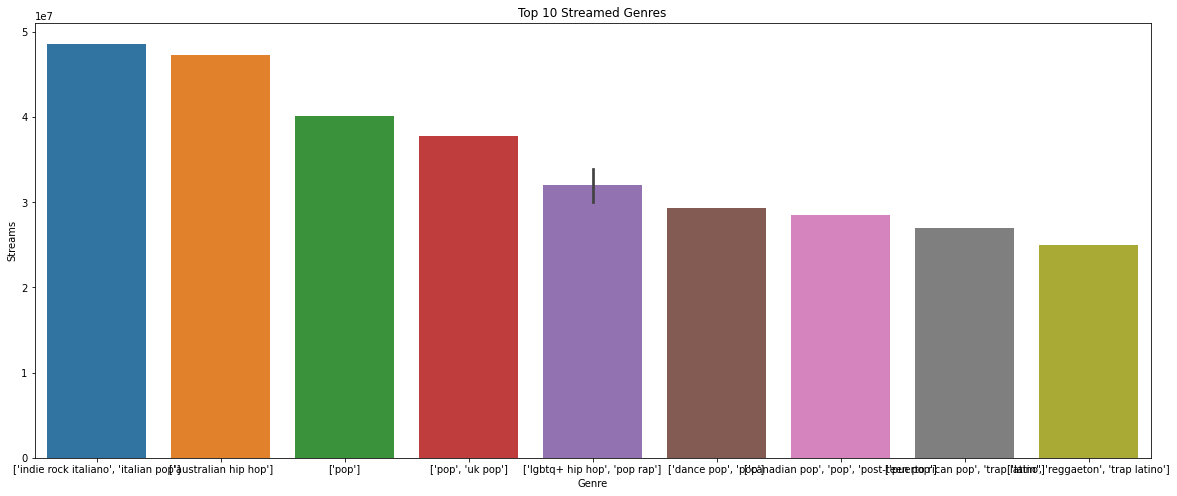

In [ ]:
#Sorting by Streams
sort_streams=cleaned_data.sort_values(by=['Streams'],ascending=False)
#Plotting Barchart about top 10 Genres and their total Streams
plt.figure(figsize=(20,8))
plt.title("Top 10 Streamed Genres")
sns.barplot(x='Genre',y='Streams',data=sort_streams.head(10))

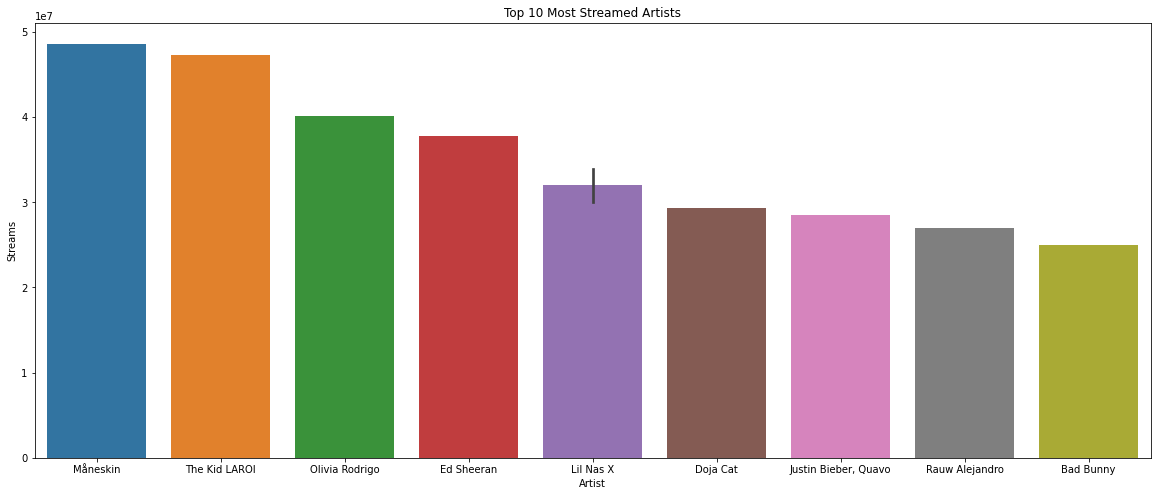

In [ ]:
#Plotting Barchart about artist and their total streams

plt.figure(figsize=(20,8))
plt.title("Top 10 Most Streamed Artists")
sns.barplot(x='Artist',y='Streams',data=sort_streams.head(10))

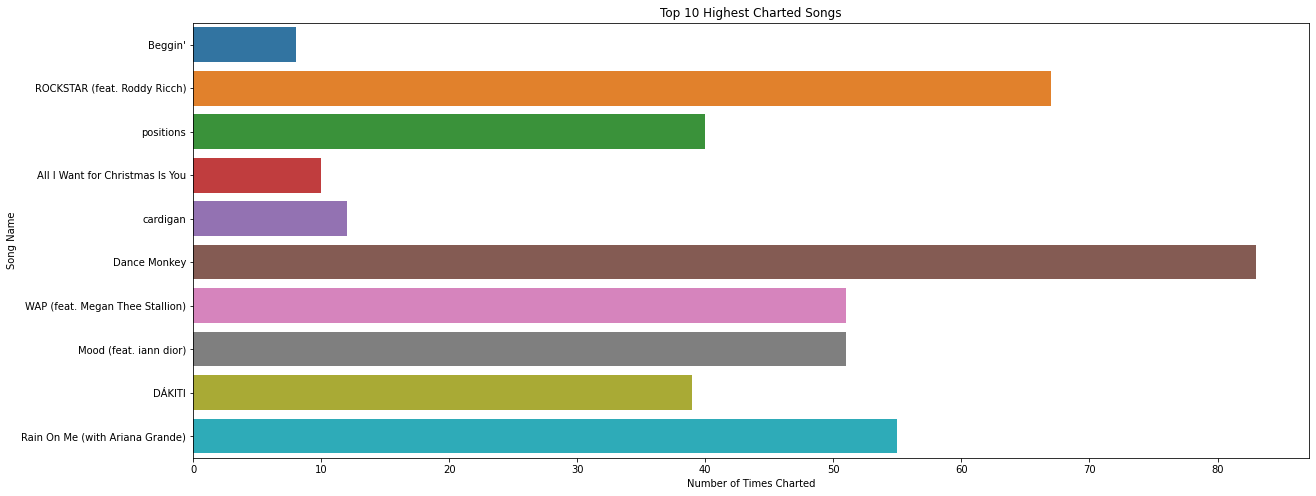

In [ ]:
#Sorting the dataset by Highest Charting Position
sort_chart=cleaned_data.sort_values(by=['Highest Charting Position'],ascending=True)
sort_chart
#Plotting Barchart about artist and their followers
plt.figure(figsize=(20,8))
plt.title("Top 10 Highest Charted Songs")
sns.barplot(x='Number of Times Charted',y='Song Name',data=sort_chart.head(10))

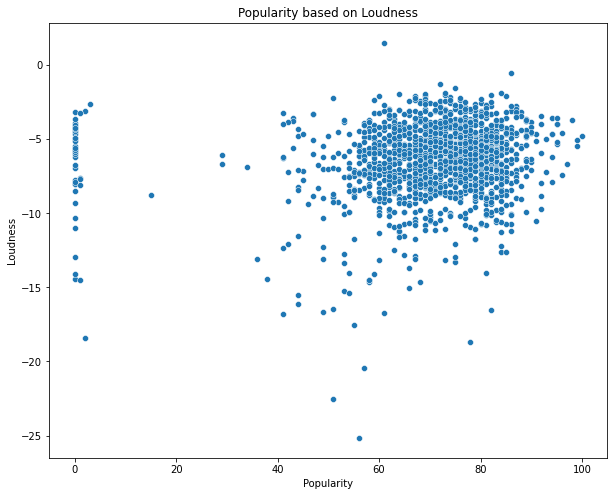

In [ ]:
#Scatterplot of Popularity of Genres based on Loudness
plt.figure(figsize=(10,8))
plt.title("Popularity based on Loudness")
sns.scatterplot(x='Popularity',y='Loudness',data=cleaned_data)

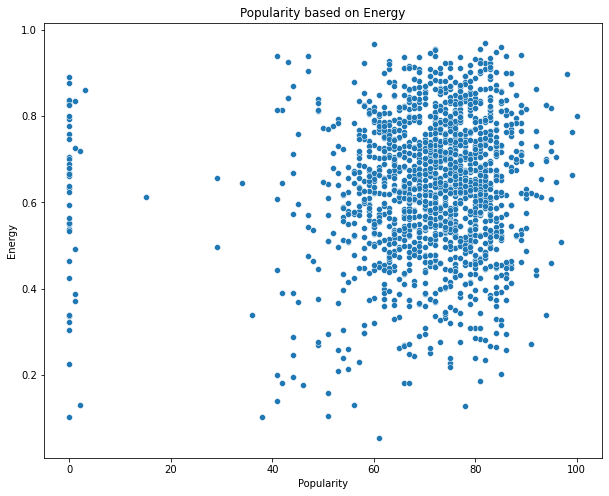

In [ ]:
#Scatterplot of Popularity of Genres based on Loudness
plt.figure(figsize=(10,8))
plt.title("Popularity based on Energy")
sns.scatterplot(x='Popularity',y='Energy',data=cleaned_data)

# Correlations

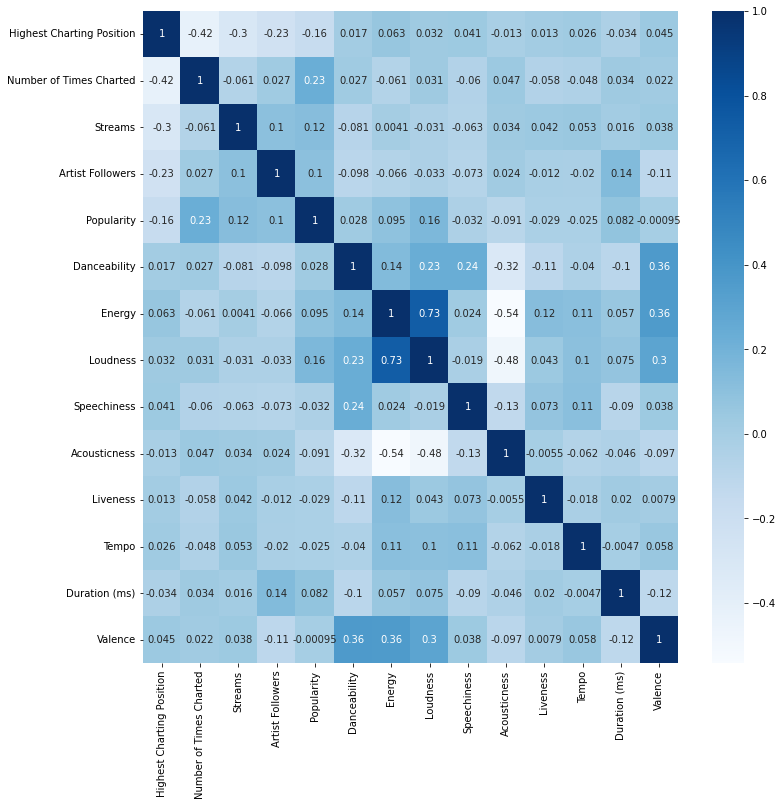

In [ ]:
#Calculating Correlation
corr=cleaned_data.corr()

#Plotting Correlation
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap="Blues")

# Prediction on Streams

**Preparation for the Modelling**

First we are going to drop some data columns such as Artist Name, Song Name and Release Date as they are not relevant for prediction.

In [ ]:
#Dropping the data columns 
cleaned_data = cleaned_data.drop(["Artist", "Song Name", "Release Date"], axis=1)
cleaned_data.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,48633449,3377762,"['indie rock italiano', 'italian pop']",100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589
1,2,3,47248719,2230022,['australian hip hop'],99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478
2,1,11,40162559,6266514,['pop'],99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688
3,3,5,37799456,83293380,"['pop', 'uk pop']",98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591
4,5,1,33948454,5473565,"['lgbtq+ hip hop', 'pop rap']",96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894


Now we must encode Genre into Numerical value, as Model cannot train having string value

In [ ]:
#Encoding Genre
genre_encoder = LabelEncoder()
cleaned_data['Genre'] = genre_encoder.fit_transform(cleaned_data['Genre'])
cleaned_data.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,48633449,3377762,276,100,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,211560,0.589
1,2,3,47248719,2230022,63,99,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,141806,0.478
2,1,11,40162559,6266514,364,99,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,178147,0.688
3,3,5,37799456,83293380,363,98,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,231041,0.591
4,5,1,33948454,5473565,312,96,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,212000,0.894


**Splitting the data into Training and Testing Sets**

In [ ]:
training_data, testing_data = train_test_split(cleaned_data, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

testing_data

No. of training examples: 1236
No. of testing examples: 309


,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
1482,73,1,9260007,46814751,187,62,0.871,0.493,-6.356,0.2050,0.0134,0.3850,144.989,200573,0.0495
1228,156,13,4411998,554042,38,77,0.815,0.518,-6.594,0.0897,0.2230,0.1040,151.891,177667,0.8770
1006,169,1,4803071,942380,246,60,0.874,0.542,-7.064,0.3440,0.0621,0.1810,142.016,196933,0.4810
661,22,2,8115520,42227614,360,66,0.575,0.434,-8.193,0.0312,0.7350,0.1050,145.916,229840,0.3480
1422,66,7,6554824,82522,114,70,0.866,0.438,-8.943,0.0719,0.1770,0.0743,129.039,223258,0.6950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,15,3,7880155,14097410,128,76,0.770,0.574,-5.525,0.1060,0.0617,0.1040,98.962,133022,0.1040
730,16,2,8413330,37151476,288,76,0.764,0.526,-7.355,0.2120,0.0484,0.0718,114.910,222243,0.5880
859,116,1,6292620,4849204,111,71,0.616,0.617,-8.431,0.5200,0.1280,0.1770,175.929,177273,0.4760
1085,145,5,4473413,207170,33,79,0.648,0.308,-11.729,0.0400,0.8860,0.1240,76.997,184638,0.1980


In [ ]:
#Dropping Stream Column From Test data
testing_data_stream=testing_data['Streams']
testing_data=testing_data.drop('Streams', axis=1)
testing_data.head()

,Highest Charting Position,Number of Times Charted,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
1482,73,1,46814751,187,62,0.871,0.493,-6.356,0.2050,0.0134,0.3850,144.989,200573,0.0495
1228,156,13,554042,38,77,0.815,0.518,-6.594,0.0897,0.2230,0.1040,151.891,177667,0.8770
1006,169,1,942380,246,60,0.874,0.542,-7.064,0.3440,0.0621,0.1810,142.016,196933,0.4810
661,22,2,42227614,360,66,0.575,0.434,-8.193,0.0312,0.7350,0.1050,145.916,229840,0.3480
1422,66,7,82522,114,70,0.866,0.438,-8.943,0.0719,0.1770,0.0743,129.039,223258,0.6950


In [ ]:
#Setting training data into x_train and y_train
x_train=training_data.drop('Streams',axis=1)
y_train=training_data['Streams']

#Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, testing_data.shape

((1236, 14), (1236,), (309, 14))

# Training and Testing Models

**Linear Regression**

In [ ]:
#Linear Regression Modelling and Training
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
print(linear_model.score(x_train,y_train))

#testing the model and Displaying the output
linear_predict=linear_model.predict(testing_data)
l_output=pd.DataFrame({'Id':testing_data.index,'Predicted Streams':linear_predict,'Actual Stream':testing_data_stream})
print(l_output)

0.16261641364117918
        Id  Predicted Streams  Actual Stream
1482  1482       6.046979e+06        9260007
1228  1228       5.377598e+06        4411998
1006  1006       4.066406e+06        4803071
661    661       8.725247e+06        8115520
1422  1422       7.208658e+06        6554824
...    ...                ...            ...
336    336       7.429517e+06        7880155
730    730       8.495627e+06        8413330
859    859       6.003380e+06        6292620
1085  1085       5.412926e+06        4473413
236    236       7.376192e+06        5912293

[309 rows x 3 columns]


In [ ]:
#Random Forest Regression
r_model=RandomForestRegressor(n_estimators=50)
r_model.fit(x_train,y_train)
print(r_model.score(x_train,y_train))

#Making predictions on test set 
r_predict=r_model.predict(testing_data)

r_output=pd.DataFrame({'Id':testing_data.index,'Predicted Streams':r_predict,'Actual Stream':testing_data_stream})
print(r_output)

0.9692772428266808
        Id  Predicted Streams  Actual Stream
1482  1482         8807197.68        9260007
1228  1228         5058258.32        4411998
1006  1006         5274498.18        4803071
661    661         6751986.70        8115520
1422  1422         4976863.22        6554824
...    ...                ...            ...
336    336         5595754.20        7880155
730    730         6456980.84        8413330
859    859         6367540.54        6292620
1085  1085         5162121.50        4473413
236    236         5579604.76        5912293

[309 rows x 3 columns]


In [ ]:
#Building the model in Ridge Regression Model
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(x_train,y_train)
print(ridge_model.score(x_train,y_train))

#Testing the model
ridge_predict=ridge_model.predict(testing_data)

#Creating dataframe to store ID with prediction
ridge_output=pd.DataFrame({'Id':testing_data.index,'Predicted Streams':ridge_predict,'Actual Stream':testing_data_stream})
print(ridge_output)

0.16259145514967488
        Id  Predicted Streams  Actual Stream
1482  1482       6.081883e+06        9260007
1228  1228       5.363479e+06        4411998
1006  1006       4.100479e+06        4803071
661    661       8.724271e+06        8115520
1422  1422       7.203076e+06        6554824
...    ...                ...            ...
336    336       7.447445e+06        7880155
730    730       8.506295e+06        8413330
859    859       6.037511e+06        6292620
1085  1085       5.419375e+06        4473413
236    236       7.375961e+06        5912293

[309 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.25073e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
#Building the model in Lasso Regression Model 
lasso_model=Lasso(alpha=1.0)
lasso_model.fit(x_train,y_train)
print(lasso_model.score(x_train,y_train))

#Testing the model
lasso_predict=lasso_model.predict(testing_data)

#Creating dataframe to store ID with prediction
lasso_output=pd.DataFrame({'Id':testing_data.index,'Predicted Streams':lasso_predict,'Actual Stream':testing_data_stream})
print(lasso_output)

0.16261641361807333
        Id  Predicted Streams  Actual Stream
1482  1482       6.047010e+06        9260007
1228  1228       5.377603e+06        4411998
1006  1006       4.066442e+06        4803071
661    661       8.725244e+06        8115520
1422  1422       7.208670e+06        6554824
...    ...                ...            ...
336    336       7.429539e+06        7880155
730    730       8.495652e+06        8413330
859    859       6.003405e+06        6292620
1085  1085       5.412921e+06        4473413
236    236       7.376196e+06        5912293

[309 rows x 3 columns]


In [ ]:
print("lasso "+str(lasso_model.score(x_train,y_train)))

lasso 0.16261641361807333


In [ ]:
from tabulate import tabulate

l = [["Lasso", lasso_model.score(x_train,y_train)],["Ridge", ridge_model.score(x_train,y_train)],["Random Forest", r_model.score(x_train,y_train)],["Linear", linear_model.score(x_train,y_train)]]
table = tabulate(l, headers=['Regression Models', 'Accuracy', ], tablefmt='orgtbl')

print(table)

| Regression Models   |   Accuracy |
|---------------------+------------|
| Lasso               |   0.162616 |
| Ridge               |   0.162591 |
| Random Forest       |   0.969277 |
| Linear              |   0.162616 |
